In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplot inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_modelc import LinearRegression

UsageError: Line magic function `%matplot` not found.


In [3]:
h1_df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [4]:
h1_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
h1_df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
10375,10375,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,0
11367,11367,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0,1
11503,11503,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,0.0,1
5477,5477,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Hispanic,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,1
16678,16678,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Unemployed,Non-MSA,1.0,0.0,1
4472,4472,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Hispanic,Female,"> $75,000",Married,Own,Employed,Non-MSA,1.0,2.0,0
617,617,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
17992,17992,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",0.0,3.0,0
8113,8113,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,NaN,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
25015,25015,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,3.0,1


In [6]:
h1_df.shape

(26707, 34)

In [8]:
h1_df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [9]:
h1_df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [12]:
h1_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          False       False           False                 False   
1          False       False           False                 False   
2          False       False           False                 False   
3          False       False           False                 False   
4          False       False           False                 False   
...          ...         ...             ...                   ...   
26702      False       False           False                 False   
26703      False       False           False                 False   
26704      False       False           False                 False   
26705      False       False           False                 False   
26706      False       False           False                 False   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                  False    

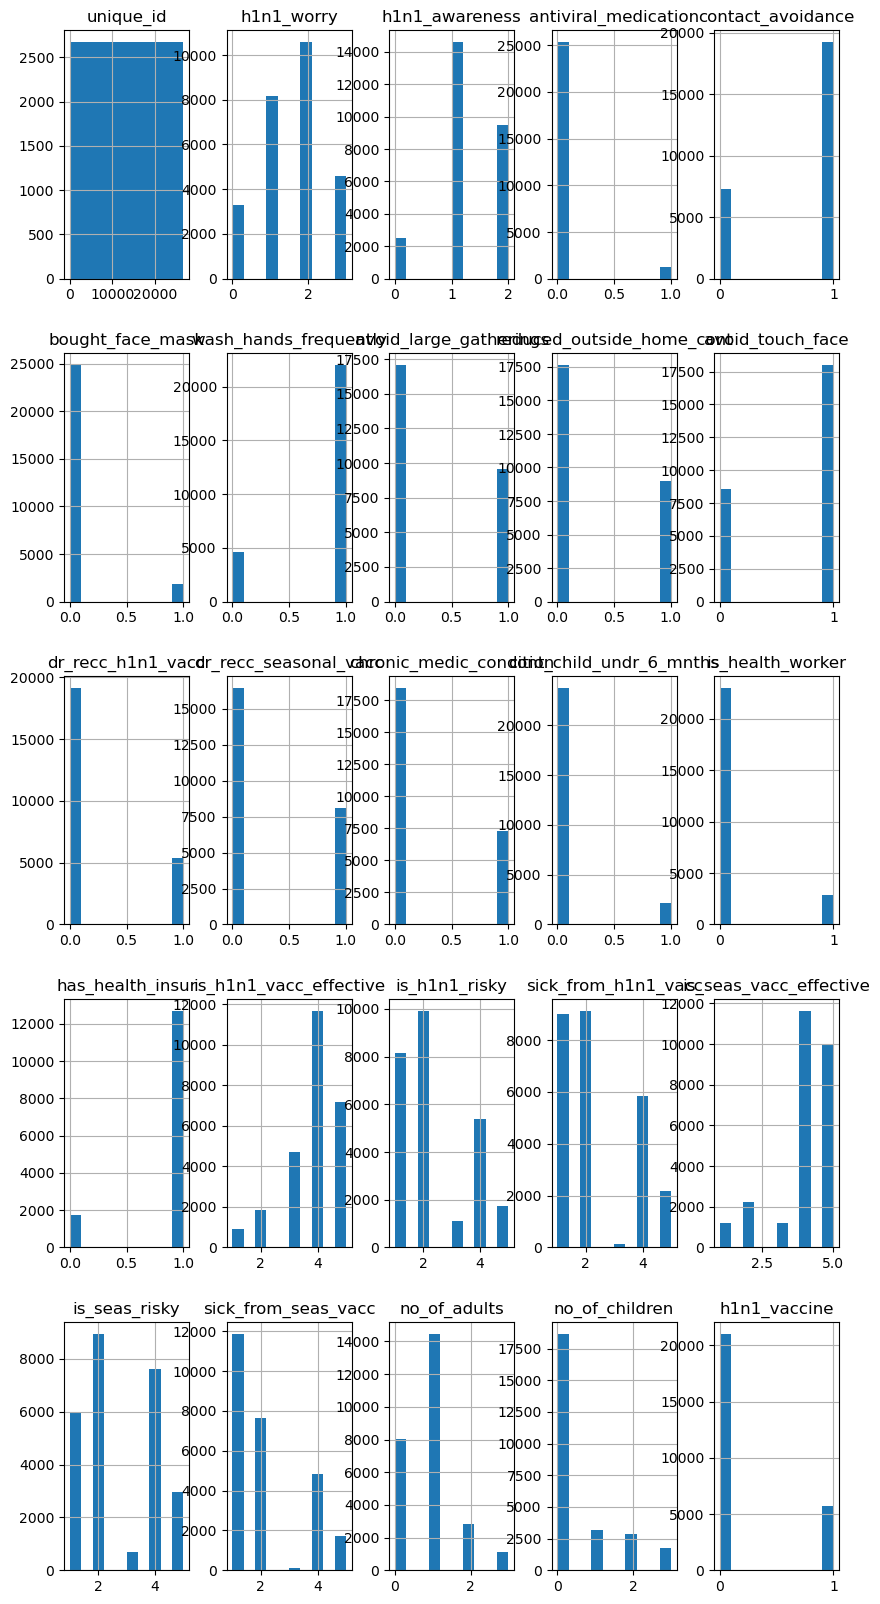

In [8]:
h1_df.hist(figsize=(10,20))
plt.show()

In [12]:
corr=h1_df.corr
corr

<bound method DataFrame.corr of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

C:\Users\War machine\AppData\Local\Temp\ipykernel_2388\2261740171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = h1_df.corr()


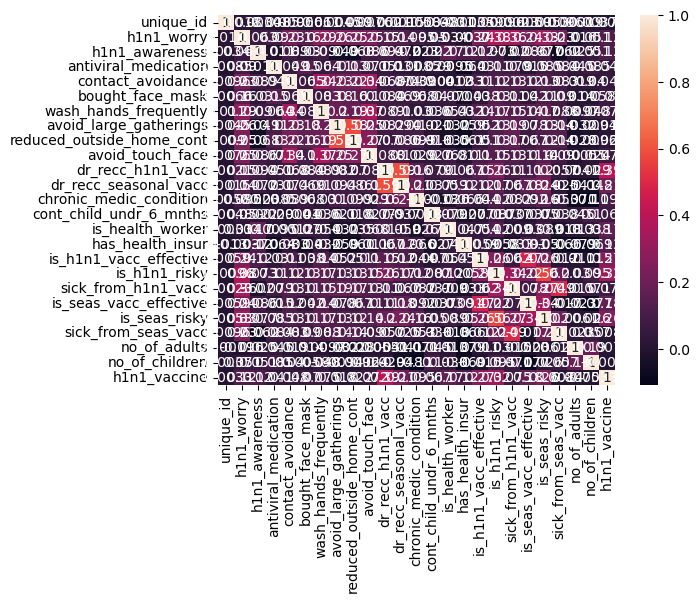

In [14]:
import seaborn as sns
corr_matrix = h1_df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()